# Linear Discriminant Analysis (LDA)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 3, 2
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['font.size'] = 8

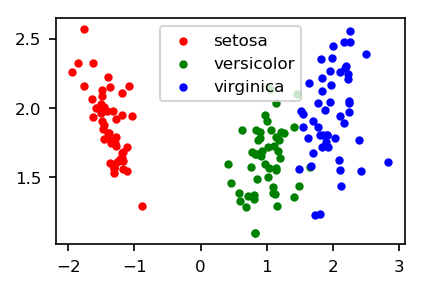

In [17]:
from sklearn import datasets
target_ids=[0,1,2]
iris = datasets.load_iris()
data = iris.data
labels = iris.target
Sw = np.zeros((4, 4))

C = np.cov(np.transpose(data))
# Loop over classes
classes = np.unique(labels)
for i in range(len(classes)):
# Find relevant datapoints
    indices = np.squeeze(np.where(labels==classes[i]))
    d = np.squeeze(data[indices,:])
    classcov = np.cov(np.transpose(d))
    Sw += np.float(np.shape(indices)[0])/50 * classcov
    
Sb = C - Sw
evals,evecs = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))
indices = np.argsort(evals)
indices = indices[::-1]
evecs = evecs[:,indices]
evals = evals[indices]
w = evecs[:,:2]
n = np.dot(data,w)

for i, c,label in zip(target_ids, 'rgb',iris.target_names):
    plt.scatter(n[i == labels, 0], n[i == labels, 1], c = c,label=label, marker='.')
plt.legend()
plt.show()


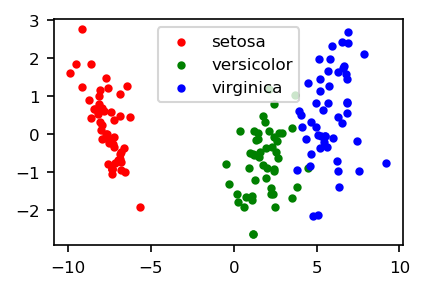

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
target_ids=[0,1,2]
lda = lda(n_components=2)
X_r2 = lda.fit(data, labels).transform(data)
for i, c, label in zip(target_ids, 'rgb',iris.target_names):
    plt.scatter(X_r2[i == labels, 0], X_r2[i == labels, 1], c = c,label=label, marker='.')
plt.legend()
plt.show()